<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Packages
<a class="anchor" id="1"></a> 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
from nltk.tokenize import word_tokenize

import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Data
<a class="anchor" id="1"></a> 

In [2]:
df_ganjar = pd.read_csv(r"../Scraper\data_clean\userProfile_ganjarpranowo.csv")
df_prabowo = pd.read_csv(r"../Scraper\data_clean\userProfile_prabowo.csv")
df_anies = pd.read_csv(r"../Scraper\data_clean\userProfile_aniesbaswedan.csv")
df_ahy = pd.read_csv(r"../Scraper\data_clean\userProfile_AgusYudhoyono.csv")
df_ridwan = pd.read_csv(r"../Scraper\data_clean\userProfile_ridwankamil.csv")

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
LDA With SKlearn
<a class="anchor" id="1"></a> 

In [7]:
# Fungsi tokenize
df_ganjar['text_token'] = df_ganjar['clean_text_stem'].apply(lambda x: word_tokenize(x))
df_prabowo['text_token'] = df_prabowo['clean_text_stem'].apply(lambda x: word_tokenize(x))
df_anies['text_token'] = df_anies['clean_text_stem'].apply(lambda x: word_tokenize(x))
df_ahy['text_token'] = df_ahy['clean_text_stem'].apply(lambda x: word_tokenize(x))
df_ridwan['text_token'] = df_ridwan['clean_text_stem'].apply(lambda x: word_tokenize(x))

TypeError: expected string or bytes-like object

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [7]:
dictionary = gensim.corpora.Dictionary(df_ganjar['text_token'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 acara
1 beliau
2 center
3 convention
4 guru
5 hadir
6 ingat
7 ingi
8 marina
9 mend
10 nasional


In [8]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df_ganjar['text_token']]

tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

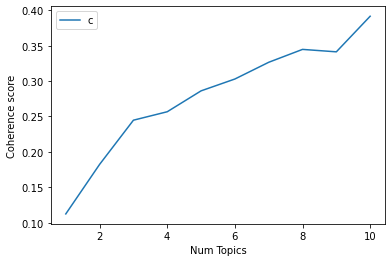

In [9]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=df_ganjar['text_token'],
                                                        start=start, limit=limit, step=step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [10]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.112299
Num Topics = 2  has Coherence Value of 0.182272
Num Topics = 3  has Coherence Value of 0.244677
Num Topics = 4  has Coherence Value of 0.256617
Num Topics = 5  has Coherence Value of 0.286113
Num Topics = 6  has Coherence Value of 0.302845
Num Topics = 7  has Coherence Value of 0.326465
Num Topics = 8  has Coherence Value of 0.344673
Num Topics = 9  has Coherence Value of 0.341231
Num Topics = 10  has Coherence Value of 0.391499


In [11]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=10) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.003*"yg" + 0.003*"tahun" + 0.003*"anak" + 0.002*"jalan" + 0.002*"tunggu" + 0.002*"operasi" + 0.002*"capai" + 0.002*"semangat" + 0.002*"hasil" + 0.002*"kerja"
Topic: 1 Word: 0.005*"jalan" + 0.004*"semangat" + 0.004*"ruang" + 0.003*"semarang" + 0.003*"kuat" + 0.003*"selamat" + 0.003*"baik" + 0.003*"dr" + 0.003*"presiden" + 0.003*"ilmu"
Topic: 2 Word: 0.004*"indonesia" + 0.003*"tahun" + 0.003*"pantau" + 0.003*"manfaat" + 0.003*"kopi" + 0.002*"jateng" + 0.002*"mas" + 0.002*"ayo" + 0.002*"ai" + 0.002*"budaya"
Topic: 3 Word: 0.003*"jawa" + 0.003*"jateng" + 0.003*"tengah" + 0.003*"yg" + 0.003*"usaha" + 0.002*"tahun" + 0.002*"mas" + 0.002*"manfaat" + 0.002*"ruang" + 0.002*"salah"
Topic: 4 Word: 0.003*"semangat" + 0.003*"yg" + 0.003*"selamat" + 0.003*"lupa" + 0.002*"hidup" + 0.002*"bahagia" + 0.002*"jateng" + 0.002*"anakanak" + 0.002*"alhamdulillah" + 0.002*"negara"
Topic: 5 Word: 0.003*"bangun" + 0.003*"warga" + 0.003*"bahagia" + 0.003*"rumah" + 0.003*"alhamdulillah" + 0.003*"

In [12]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
top_word = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])
print(top_word)

    Topic     Word         P
0       0       yg  0.003055
1       0    tahun  0.002902
2       0     anak  0.002598
3       0    jalan  0.002438
4       0   tunggu  0.002395
..    ...      ...       ...
95      9  selamat  0.002576
96      9     jawa  0.002565
97      9      ayo  0.002553
98      9    tahun  0.002549
99      9   tengah  0.002403

[100 rows x 3 columns]


In [13]:
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.save_html(data, 'lda-gensim-tfidf.html')

c:\Users\Zagreus\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
